# Описание данных 

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.



In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import text, create_engine
from IPython.display import display, HTML
from PIL import Image
import requests

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})
con=engine.connect()

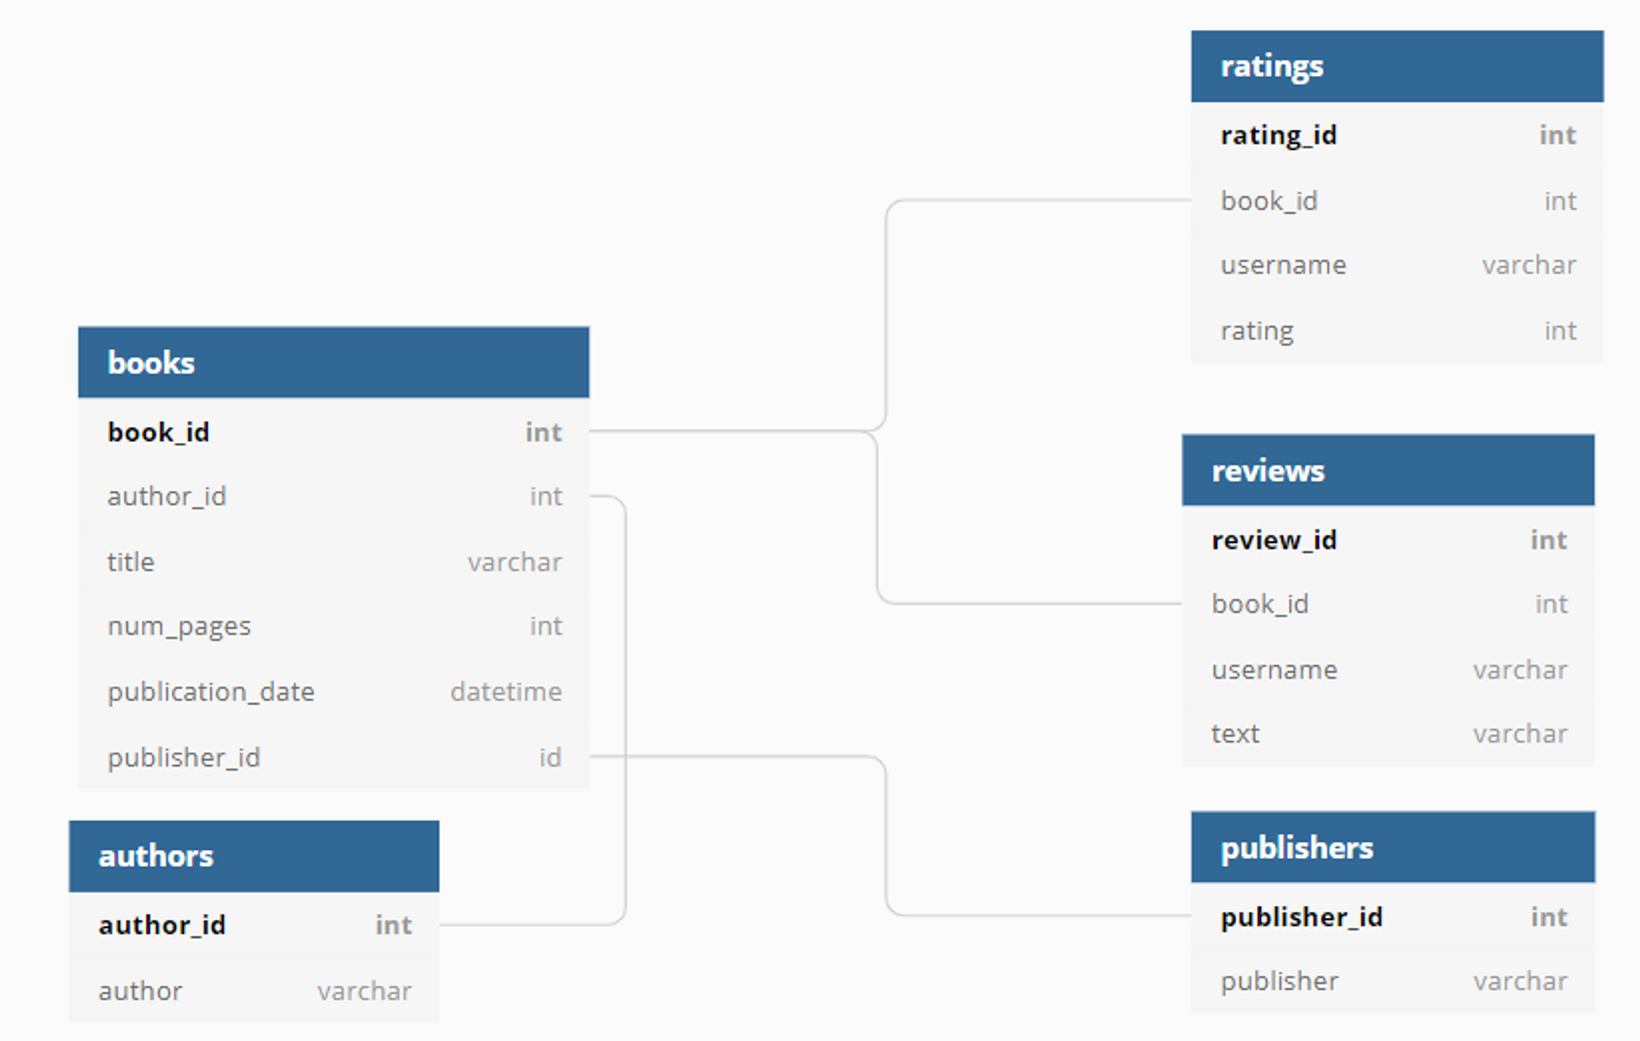

In [3]:
#Загрузим табилцу 
url = 'https://concrete-web-bad.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F069818d1-0e5c-4d87-a461-0de584ab9c33%2FUntitled_(33).png?id=bd53c8db-b4fd-49eb-8cc9-572ebb3c9163&table=block&spaceId=9e4bd47b-c6e6-4ca3-bcee-279794b47315&width=1640&userId=&cache=v2'

image = Image.open(requests.get(url, stream=True).raw)
display(image)

# Как выполнить задание?

- Опишите цели исследования;
- Исследуйте таблицы — выведите первые строки;
- Сделайте по одному SQL-запросу для решения каждого задания;
- Выведите результат каждого запроса в тетрадке;
- Опишите выводы по каждой из решённых задач.

# Откроем данные и изучим 

In [4]:
def get_data (df):
    query = f"SELECT * FROM {df}"
    return pd.read_sql_query(query, engine)

In [5]:
books_df = get_data('books')
authors_df = get_data('authors')
publishers_df = get_data('publishers')
ratings_df = get_data('ratings')
reviews_df = get_data('reviews')


In [6]:
#Посмотирм первые строки таблиц и все проверим 
display(books_df.head(5),
        authors_df.head(5),
        publishers_df.head(5),
        ratings_df.head(5),
       reviews_df.head(5))

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


У нас есть доступ ко всем базам и они верно отображаются 

# Задачи 

## Посчитайте, сколько книг вышло после 1 января 2000 года

In [7]:
# чтобы выполнить SQL-запрос, используем Pandas
query = '''SELECT MAX(publication_date)
           FROM books'''

df = pd.io.sql.read_sql(sql=text(query), con = con)

In [8]:
df

,max
0,2020-03-31


Максимальная дата в нашем датасете

In [9]:
# чтобы выполнить SQL-запрос, используем Pandas
query = '''SELECT COUNT(book_id)
           FROM books
           WHERE publication_date > '2000-01-01';'''


df = pd.io.sql.read_sql(sql=text(query), con = con)
df = df.iloc[0, 0]

In [10]:
print('После 1 января 2000 года вышло книг {}'.format(df))

После 1 января 2000 года вышло книг 819


В нашем датасете максимальная дата 2020 год. 
Книг вышедных после 1 января 2020  составило 819
Можем посчитать, чтобы прочесть все книги за 20 лет, надо читать по 3.5 книги каждый месяц. 
Исходя из общего количества у нас довольно не плохая библиотека книг. 

## Для каждой книги посчитайте количество обзоров и среднюю оценку

In [11]:
# чтобы выполнить SQL-запрос, используем Pandas
query = '''SELECT COUNT(book_id)
           FROM books'''

df = pd.io.sql.read_sql(sql=text(query), con = con)
df.head()

,count
0,1000


In [12]:
# чтобы выполнить SQL-запрос, используем Pandas
query = '''SELECT COUNT(review_id) as count_review,
                  book_id
                  
           FROM reviews
           GROUP BY book_id
           ORDER BY count_review DESC
            '''

df = pd.io.sql.read_sql(sql=text(query), con = con)

In [13]:
df

,count_review,book_id
0,7,948
1,6,656
2,6,497
3,6,963
4,6,696
...,...,...
989,1,599
990,1,187
991,1,156
992,1,984


In [14]:
# чтобы выполнить SQL-запрос, используем Pandas
query = '''SELECT title AS name_book,
                  n.book_id,
                  COUNT(DISTINCT review_id) AS count_review,
                  AVG(rating) as rating_mean
                  
           FROM ratings AS r 
           LEFT JOIN reviews AS n ON r.book_id = n.book_id
           LEFT JOIN books AS b ON r.book_id = b.book_id
           GROUP BY name_book, n.book_id
           ORDER BY count_review DESC, rating_mean DESC '''

df = pd.io.sql.read_sql(sql=text(query), con = con)

In [15]:
df.head()

,name_book,book_id,count_review,rating_mean
0,Twilight (Twilight #1),948.0,7,3.662500
1,Harry Potter and the Prisoner of Azkaban (Harr...,302.0,6,4.414634
2,Harry Potter and the Chamber of Secrets (Harry...,299.0,6,4.287500
3,The Book Thief,656.0,6,4.264151
4,The Glass Castle,734.0,6,4.206897


Топ 10 бестселлеров нашей библиотеки по количечсву ревью и рейтиннгу :) 

In [16]:
# чтобы выполнить SQL-запрос, используем Pandas
query = '''SELECT COUNT(DISTINCT b.book_id)
           FROM ratings AS r 
           LEFT JOIN reviews AS n ON r.book_id = n.book_id
           LEFT JOIN books AS b ON r.book_id = b.book_id '''

df = pd.io.sql.read_sql(sql=text(query), con = con)

In [17]:
df.head()

,count
0,1000


## Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры

In [18]:
# чтобы выполнить SQL-запрос, используем Pandas
query = '''SELECT publisher,
                  COUNT(book_id) as count_books
                  
           FROM books AS b 
           JOIN publishers AS p ON b.publisher_id = p.publisher_id
           
           WHERE num_pages > 50
           GROUP BY publisher
           ORDER BY count_books DESC
           LIMIT 5'''

df = pd.io.sql.read_sql(sql=text(query), con = con)
df_0 = df.iloc[0, 0]
df_1 = df.iloc[0, 1]

In [19]:
df

,publisher,count_books
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Bantam,19


In [20]:
print('Издательство {} выпустио больше всего книг толще 50 страниц, их количество составило {} шт'\
      .format(df_0, df_1))

Издательство Penguin Books выпустио больше всего книг толще 50 страниц, их количество составило 42 шт


## Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [21]:
# чтобы выполнить SQL-запрос, используем Pandas
query = '''WITH 
           r AS (SELECT book_id,
                 COUNT(rating) AS count_rating,
                 AVG(rating) AS mean_rating
                 
                 FROM ratings
                 GROUP BY book_id
                 ORDER BY count_rating DESC)
           
           SELECT COUNT(DISTINCT title),
                  author,
                  count_rating,
                  ROUND(mean_rating, 2) as avg_rating
                  
           FROM books AS b 
           JOIN r ON b.book_id = r.book_id
           JOIN author AS a ON b.author_id = a.author_id
           WHERE count_rating >= 50
           GROUP BY author, count_rating, avg_rating
           ORDER BY avg_rating DESC
           LIMIT 1'''


df = pd.io.sql.read_sql(sql=text(query), con = con)
df_0 = df.iloc[0, 0]
df_1 = df.iloc[0, 1]
df_2 = df.iloc[0, 2]
df_3 = df.iloc[0, 3]

In [22]:
df

,count,author,count_rating,avg_rating
0,1,J.K. Rowling/Mary GrandPré,82,4.41


In [23]:
print(' {} автор книги {} имеет самую высокую оценку {} и количество отзывов составило {} шт'\
      .format(df_1, df_0, df_3, df_2))

 J.K. Rowling/Mary GrandPré автор книги 1 имеет самую высокую оценку 4.41 и количество отзывов составило 82 шт


In [24]:
# чтобы выполнить SQL-запрос, используем Pandas
query = '''WITH
            r AS (SELECT book_id,
                  SUM(rating) AS sum_rating,
                  AVG(rating) AS avg_rating
           FROM ratings
           GROUP BY book_id
           HAVING SUM(rating) > 50)
           
           SELECT author,
                  COUNT(title),
                  ROUND(AVG(avg_rating),2) as avg_rating
           FROM books AS b 
           JOIN r ON b.book_id = r.book_id
           JOIN author AS a ON b.author_id = a.author_id
           GROUP BY author
           ORDER BY avg_rating DESC
           '''


df = pd.io.sql.read_sql(sql=text(query), con = con)
df_0 = df.iloc[0, 0]
df_1 = df.iloc[0, 1]
df_2 = df.iloc[0, 2]

In [25]:
df

,author,count,avg_rating
0,Lisa See,1,4.64
1,Agatha Christie,1,4.45
2,Margaret Mitchell,1,4.43
3,George R.R. Martin,1,4.39
4,Barbara Kingsolver,1,4.36
...,...,...,...
78,Elizabeth Gilbert,1,3.40
79,Lauren Weisberger,1,3.38
80,Bram Stoker/Nina Auerbach/David J. Skal,1,3.30
81,Kim Edwards,1,3.26


In [26]:
print(' {} автор с самой высокой средней оценкой книги , оценка составила {} она написала книг в количестве {} шт '\
      .format(df_0, df_2, df_1))

 Lisa See автор с самой высокой средней оценкой книги , оценка составила 4.64 она написала книг в количестве 1 шт 


Не совсем понимаю. нас устроит одна книга? Не все авторы пишут много книг ...


In [27]:
# чтобы выполнить SQL-запрос, используем Pandas
query = '''WITH
            r AS (SELECT book_id,
                  SUM(rating) AS sum_rating,
                  AVG(rating) AS avg_rating
           FROM ratings
           GROUP BY book_id
           HAVING SUM(rating) > 50)
           
           SELECT author,
                  COUNT(title),
                  ROUND(AVG(avg_rating),2) as avg_rating
           FROM books AS b 
           JOIN r ON b.book_id = r.book_id
           JOIN author AS a ON b.author_id = a.author_id
           GROUP BY author
           HAVING  COUNT(title) > 1
           ORDER BY avg_rating DESC
           '''


df = pd.io.sql.read_sql(sql=text(query), con = con)
df_0 = df.iloc[0, 0]
df_1 = df.iloc[0, 1]
df_2 = df.iloc[0, 2]

In [28]:
df

,author,count,avg_rating
0,J.K. Rowling/Mary GrandPré,4,4.28
1,J.R.R. Tolkien,2,4.26
2,Roald Dahl/Quentin Blake,3,4.21
3,Rick Riordan,2,4.18
4,Stephen King,2,4.12
5,Nicholas Sparks,3,3.87
6,Malcolm Gladwell,2,3.85
7,Dan Brown,2,3.75


In [29]:
print(' {} автор с самой высокой средней оценкой книги , оценка составила {} она написала книг в количестве {} шт '\
      .format(df_0, df_2, df_1))

 J.K. Rowling/Mary GrandPré автор с самой высокой средней оценкой книги , оценка составила 4.28 она написала книг в количестве 4 шт 


## Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

In [30]:
# чтобы выполнить SQL-запрос, используем Pandas
query = '''WITH 
           a AS (SELECT DISTINCT(username) as username,
                 COUNT(rating) AS count_rating
            
                 FROM ratings
                 GROUP BY username),
                 
           r AS (SELECT DISTINCT(username) as username,
                        COUNT(book_id) count_reviews
                 FROM reviews
                 GROUP BY username)
            
            
            SELECT ROUND(AVG(count_reviews),2) as mean_reviews
            FROM a
            JOIN r ON a.username = r.username
            WHERE count_rating > 48'''

df = pd.io.sql.read_sql(sql=text(query), con = con)
df_0= df.iloc[0, 0]

In [31]:
df

,mean_reviews
0,24.0


In [32]:
print('Среднее количество обзоров пользоваталей, которые поставили больше 48 оценок составил {} шт'.format (df_0))

Среднее количество обзоров пользоваталей, которые поставили больше 48 оценок составил 24.0 шт


Активные пользователи, которые поставили больше 48 оценок книгам в среднем оставляют 24 обзора. 
Получается на 2 оценки приходится в среднем один обзор. Результат очень крутой. Пользователям интересно выражать свое мнение как оценкой так и обзором. 